# Bank Customer Churn Prediction using Artificial Neural Network

Given a Bank customer, can we build a classifier which can determine whether they will leave in the next 6 months or not?

Dataset : https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

###### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

###### Reading Dataset 

In [14]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


###### Checking for null values

In [3]:
df.isnull().sum()         # seems like there aren't any

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Exploratory Data Analysis

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.Surname.value_counts() 

Smith        32
Scott        29
Martin       29
Walker       28
Brown        26
             ..
Etheridge     1
Stirling      1
Siddons       1
Brient        1
Gallop        1
Name: Surname, Length: 2932, dtype: int64

0    7963
1    2037
Name: Exited, dtype: int64


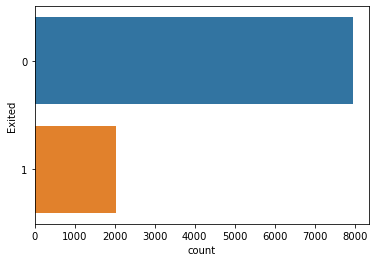

In [63]:
sns.countplot(y =df.Exited)
print(df.Exited.value_counts())

In [9]:
df.Geography.value_counts()   

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

So there are just 3 countries considered

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


<AxesSubplot:xlabel='count', ylabel='Geography'>

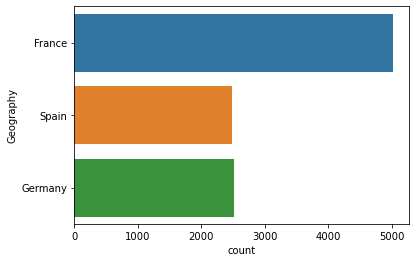

In [55]:
print(df.Geography.value_counts())
sns.countplot( y = df.Geography)

In [58]:
# how many people exited from each country?

france = df[df.Geography == 'France'].Exited.sum()
germany = df[df.Geography == 'Germany'].Exited.sum()
spain = df[df.Geography == 'Spain'].Exited.sum()


print(f"Germany : {germany} people left")
print(f"France : {france} people left")
print(f"Spain : {spain} people left")




Germany : 814 people left
France : 810 people left
Spain : 413 people left


Spain has the least no. of customers leaving the bank

Male      5457
Female    4543
Name: Gender, dtype: int64


<AxesSubplot:xlabel='count', ylabel='Gender'>

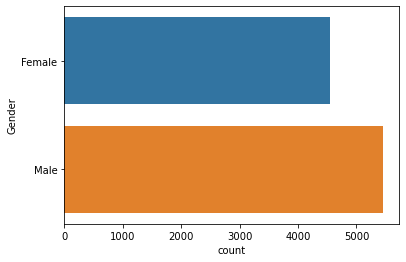

In [54]:

print(df.Gender.value_counts())
sns.countplot( y = df.Gender)

In [50]:
pd.pivot_table(df, index = 'Exited', values = ['CreditScore', 'Age','Tenure','Balance','EstimatedSalary'])

,Age,Balance,CreditScore,EstimatedSalary,Tenure
Exited,,,,,
0,37.408389,72745.296779,651.853196,99738.391772,5.033279
1,44.837997,91108.539337,645.351497,101465.677531,4.932744


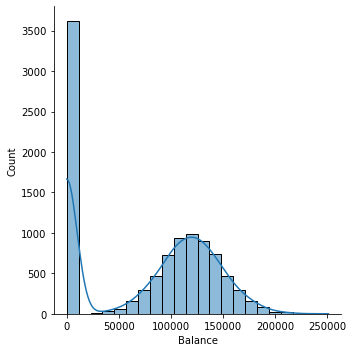

In [59]:
sns.displot(df.Balance, kde = True)

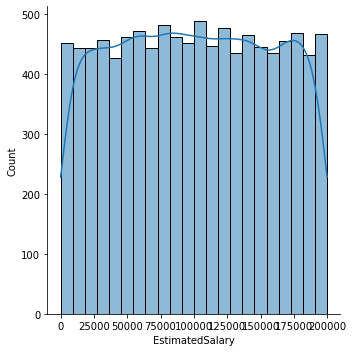

In [60]:
sns.displot(df.EstimatedSalary, kde = True)

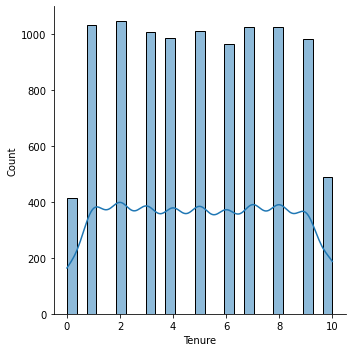

In [61]:
sns.displot(df.Tenure, kde = True)

In [64]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [128]:
def get_distribution_plot(df, col):
    plt.figure(figsize = (20,10))
    plt.subplot(1,2,1)
    sns.distplot(df[df.Exited == 1][col], label = 'Exited' );
    sns.distplot(df[df.Exited == 0][col], label = 'Continued' );
    plt.legend()
    
    plt.subplot(1,2,2) 
    sns.countplot( x = df[col])
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


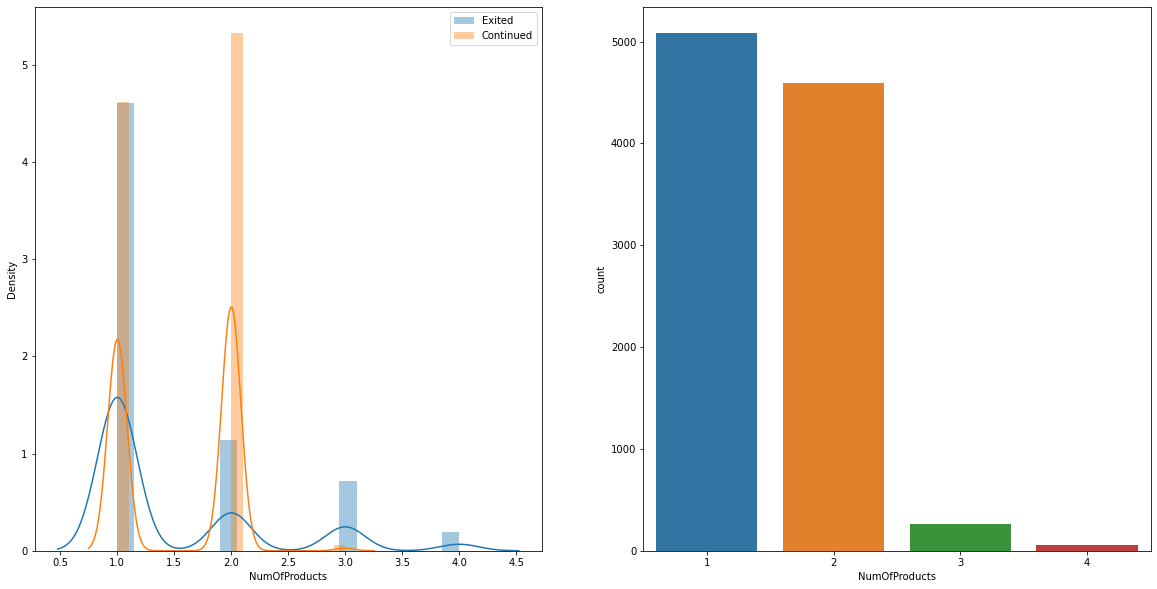

In [129]:
get_distribution_plot(df,'NumOfProducts')


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


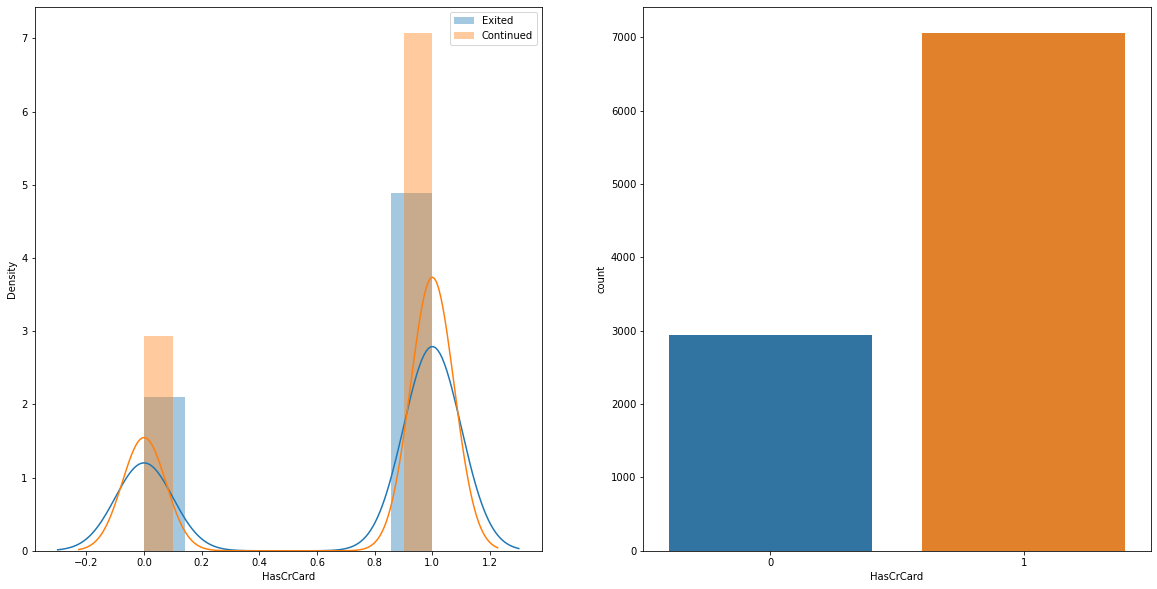

In [104]:
get_distribution_plot(df,'HasCrCard')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


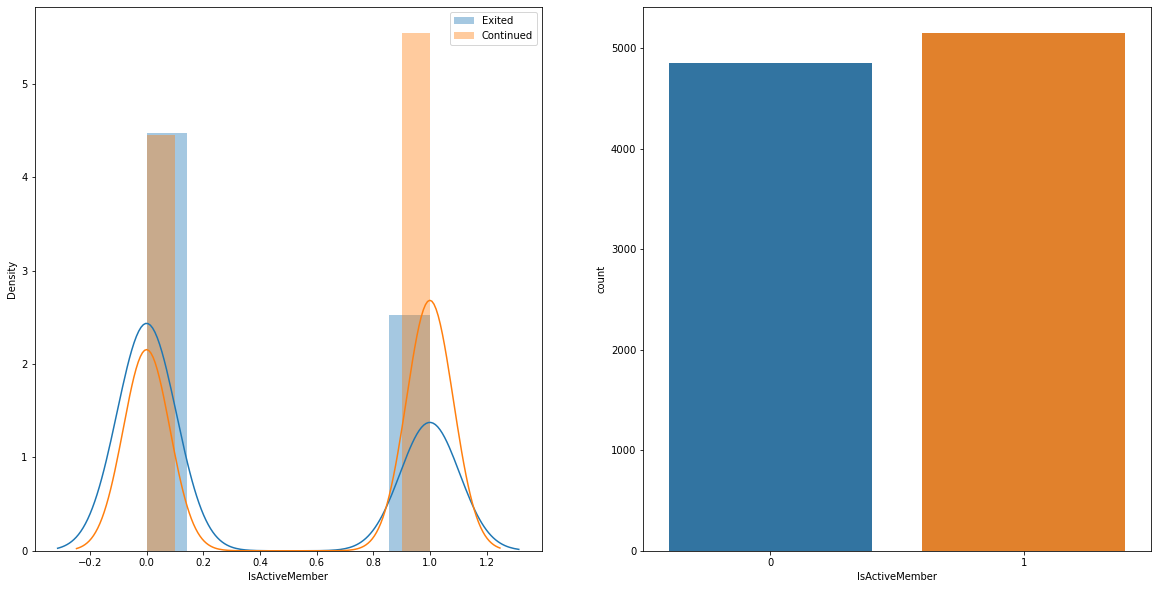

In [130]:
get_distribution_plot(df,'IsActiveMember')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


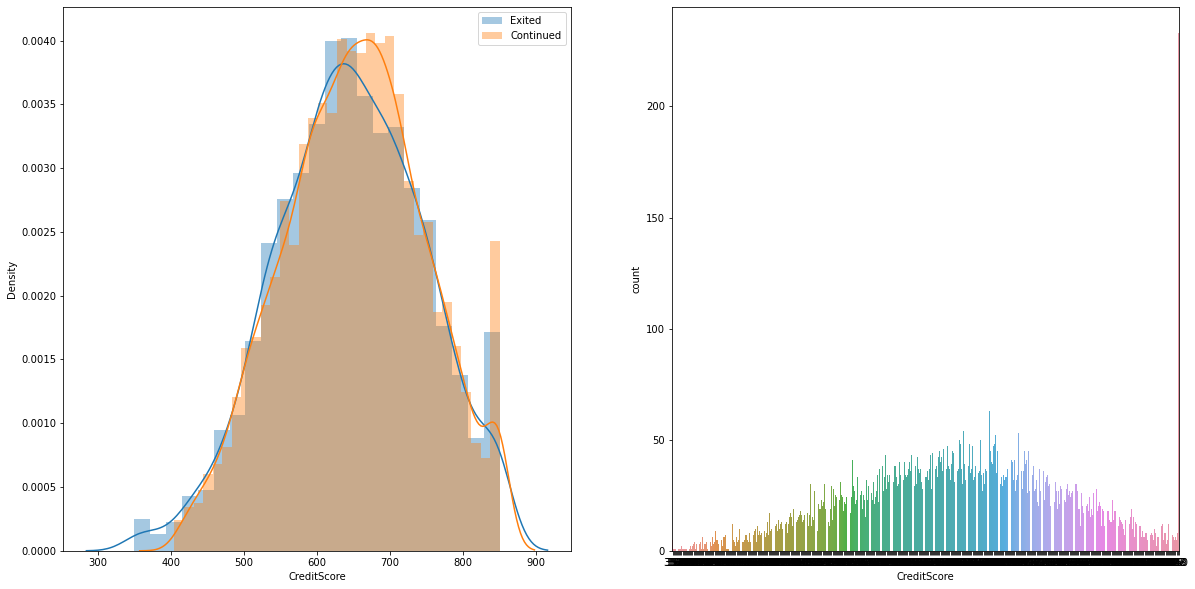

In [132]:
get_distribution_plot(df,'CreditScore')

# Making data ready for model buiding

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [25]:
cols = df.columns[3:-1]
X = df[cols]
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [26]:
y = df.Exited
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

###### Handling Categorical Columns - One Hot Encoding

In [27]:
X = pd.get_dummies(X , columns = ['Geography', 'Gender'], drop_first = True)
X



,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


###### MinMaxScaling

In [28]:
cols_to_scale = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,0,0,0
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,1,0
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,0,0,0
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,0,0
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0,0,1
9996,0.332,0.229730,1.0,0.228657,0.000000,1,1,0.508490,0,0,1
9997,0.718,0.243243,0.7,0.000000,0.000000,0,1,0.210390,0,0,0
9998,0.844,0.324324,0.3,0.299226,0.333333,1,0,0.464429,1,0,1


# Spitting Dataset
as training and test dataset 

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 45)
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
4643,0.494,0.567568,0.0,0.525226,0.000000,0,0,0.053465,0,0,0
2390,0.504,0.189189,0.7,0.736219,0.333333,1,0,0.568906,1,0,1
6162,0.796,0.216216,0.5,0.334835,0.000000,1,1,0.685013,0,0,1
8678,0.336,0.135135,0.9,0.339366,0.000000,0,0,0.013963,0,0,0
6944,1.000,0.243243,0.7,0.409731,0.000000,1,1,0.436746,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
8772,0.836,0.162162,0.6,0.000000,0.333333,1,1,0.997309,0,0,1
163,0.742,0.243243,0.2,0.000000,0.333333,1,1,0.534882,0,1,0
6012,0.776,0.108108,0.3,0.000000,0.333333,1,0,0.337395,0,0,0
6558,0.672,0.270270,0.0,0.550548,0.000000,0,1,0.579637,0,0,1


In [30]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
4132,0.380,0.135135,0.6,0.335280,0.000000,0,1,0.403473,0,1,0
6553,0.576,0.432432,0.1,0.409112,0.000000,1,0,0.841822,1,0,1
7604,0.682,0.567568,0.6,0.402836,0.000000,1,0,0.886806,0,0,0
585,0.820,0.445946,0.2,0.402341,0.000000,0,0,0.898102,0,0,0
5924,0.776,0.283784,0.1,0.376390,0.333333,0,1,0.947187,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
193,0.502,0.189189,0.8,0.370720,0.000000,1,0,0.434771,0,0,1
7500,0.688,0.391892,0.4,0.000000,0.333333,1,0,0.987680,0,0,1
2949,0.338,0.283784,0.4,0.445998,0.000000,1,1,0.487875,0,1,1
9842,0.576,0.162162,0.9,0.545275,0.333333,1,1,0.533208,0,1,1


# Model Building

In [33]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(11, input_shape = (11,), activation = 'relu'),
    keras.layers.Dense(7, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
    
])


model.compile( optimizer = 'adam',
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
250/250 [==============================] - 3s 3ms/step - loss: 0.5506 - accuracy: 0.7935
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4698 - accuracy: 0.8038: 0s - loss: 0.4665 - accura
Epoch 3/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4718 - accuracy: 0.7968
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4524 - accuracy: 0.8009
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4330 - accuracy: 0.8138
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4297 - accuracy: 0.8175
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4258 - accuracy: 0.8148
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4177 - accuracy: 0.8198
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4040 - accuracy: 0.8256
Epoch 10/100
250/250 [==============================] - 0s 2ms/

250/250 [==============================] - 0s 1ms/step - loss: 0.3484 - accuracy: 0.8606
Epoch 81/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3384 - accuracy: 0.8679
Epoch 82/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3359 - accuracy: 0.8663
Epoch 83/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3513 - accuracy: 0.8588
Epoch 84/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3427 - accuracy: 0.8632
Epoch 85/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3282 - accuracy: 0.8653
Epoch 86/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3524 - accuracy: 0.8570
Epoch 87/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3362 - accuracy: 0.8637
Epoch 88/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3437 - accuracy: 0.8635
Epoch 89/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3433 - accuracy: 

# Evaluating model on test dataset

In [34]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 1s 3ms/step - loss: 0.3388 - accuracy: 0.8555


[0.33878952264785767, 0.8554999828338623]

# Making Prediction on a sample

In [35]:
model_pred = model.predict(X_test)
model_pred[:10]

array([[0.05846262],
       [0.85763735],
       [0.9413235 ],
       [0.69581807],
       [0.14388582],
       [0.24981123],
       [0.10838521],
       [0.33380884],
       [0.0473493 ],
       [0.39584607]], dtype=float32)

In [37]:
y_pred = []
for prediction in model_pred:
    if prediction > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
y_pred[:10]

[0, 1, 1, 1, 0, 0, 0, 0, 0, 0]

In [38]:
y_test[:10]

4132    0
6553    1
7604    1
585     1
5924    0
9642    0
2846    0
9751    0
1891    0
3367    1
Name: Exited, dtype: int64

# Classification Report

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1581
           1       0.75      0.47      0.58       419

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000



<AxesSubplot:>

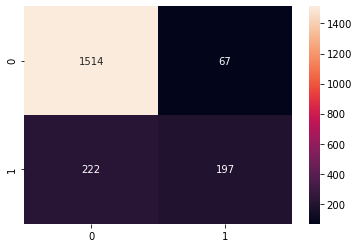

In [43]:
confusion_matrix = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)
sns.heatmap(confusion_matrix, annot = True, fmt = 'd')